# Procesamiento básico de imágenes con Python

Breve explicación del objetivo del notebook: explorar técnicas fundamentales del procesamiento de imágenes utilizando Python y bibliotecas como skimage, PIL y matplotlib.

## Carga y visualización de una imagen

Carga de una imagen de ejemplo (data.chelsea de skimage)

Visualización original de la imagen

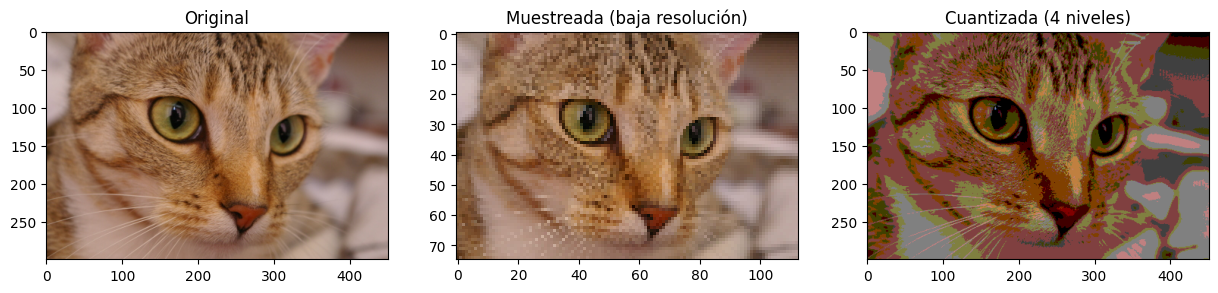

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Cargar imagen de ejemplo (ej. 'camera' de skimage)
imagen = data.chelsea()

# Reducción de resolución (muestreo)
imagen_muestreada = imagen[::4, ::4]  # Submuestreo cada 4 píxeles

# Reducción de niveles de color (cuantificación)
imagen_cuantizada = (imagen // 64) * 64  # Reducción a 4 niveles (8 bits -> 2 bits)

# Visualización
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(imagen, cmap='gray'); ax[0].set_title("Original")
ax[1].imshow(imagen_muestreada, cmap='gray'); ax[1].set_title("Muestreada (baja resolución)")
ax[2].imshow(imagen_cuantizada, cmap='gray'); ax[2].set_title("Cuantizada (4 niveles)")
plt.show()

## 

In [2]:
from PIL import Image

# Guardar en diferentes formatos
Image.fromarray(imagen).save("imagen.png")  # Sin pérdida
Image.fromarray(imagen).save("imagen.jpg", quality=30)  # Con pérdida (baja calidad)

In [4]:
!wget 'https://i.pinimg.com/736x/2e/4c/f9/2e4cf9f21cb4b886f1300f66a5c136a6.jpg'

--2025-04-23 17:36:03--  https://i.pinimg.com/736x/2e/4c/f9/2e4cf9f21cb4b886f1300f66a5c136a6.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.192.84, 151.101.0.84, 151.101.64.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.192.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83350 (81K) [image/jpeg]
Saving to: ‘2e4cf9f21cb4b886f1300f66a5c136a6.jpg’

2e4cf9f21cb4b886f13 100%[===================>]  81.40K  --.-KB/s    in 0.004s  

2025-04-23 17:36:03 (21.7 MB/s) - ‘2e4cf9f21cb4b886f1300f66a5c136a6.jpg’ saved [83350/83350]



## Obtención de paleta de colores

In [5]:
from PIL import Image

# Cargar imagen desde el mismo directorio del notebook
imagen_paleta = Image.open("frutal.jpg")

# Convertir la imagen a modo 'P' (paleta), usando una paleta adaptativa de 256 colores
imagen_paleta = imagen_paleta.convert("P", palette=Image.ADAPTIVE, colors=256)

# Obtener la paleta de colores (lista de valores RGB planos)
paleta = imagen_paleta.getpalette()

# Mostrar la paleta
print("Paleta:", paleta)


Paleta: [230, 238, 216, 231, 232, 199, 219, 231, 205, 224, 223, 188, 213, 222, 193, 208, 220, 191, 225, 209, 164, 209, 207, 178, 206, 206, 175, 198, 206, 177, 197, 202, 166, 229, 191, 152, 211, 195, 166, 205, 195, 168, 200, 195, 166, 200, 190, 163, 199, 193, 153, 192, 195, 165, 185, 193, 164, 189, 191, 152, 223, 185, 157, 223, 180, 153, 212, 179, 153, 197, 184, 156, 199, 176, 151, 221, 175, 143, 233, 175, 95, 200, 175, 144, 199, 175, 128, 188, 184, 151, 179, 183, 150, 188, 175, 147, 178, 175, 144, 186, 174, 136, 184, 174, 123, 173, 173, 134, 167, 171, 114, 218, 161, 130, 208, 160, 130, 237, 160, 47, 217, 158, 65, 193, 164, 135, 192, 157, 133, 191, 157, 116, 178, 164, 131, 177, 157, 126, 167, 163, 126, 165, 157, 123, 168, 157, 116, 167, 157, 99, 147, 165, 103, 146, 164, 97, 143, 164, 99, 143, 163, 100, 141, 162, 97, 145, 161, 94, 142, 161, 93, 146, 157, 99, 141, 160, 91, 147, 157, 90, 141, 158, 90, 142, 155, 88, 143, 154, 81, 139, 161, 96, 139, 158, 96, 137, 157, 94, 135, 158, 94, 138, 

## Visualización de paleta de colores

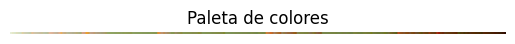

In [7]:
# Crea una imagen con la paleta
paleta_imagen = np.array(paleta).reshape(-1, 3)
paleta_imagen = paleta_imagen[np.newaxis, :, :]  # Agrega una dimensión extra

# Muestra la imagen
plt.imshow(paleta_imagen)
plt.axis('off')  # Oculta los ejes
plt.title("Paleta de colores")
plt.show()

## Conversión a 256 colores, extracción y visualización de la paleta afectada a la imagen

Imagen horizontal con la paleta

Cuadrícula visual de los colores de la paleta

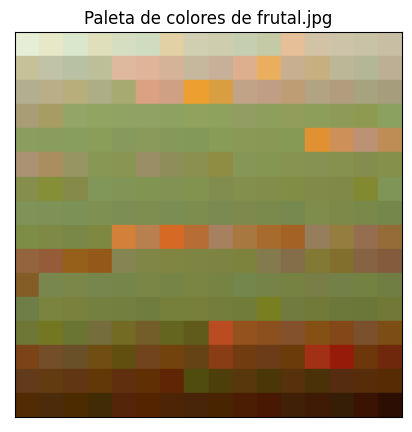

In [8]:
# Convertir la paleta a una matriz NumPy
paleta_array = np.array(paleta).reshape(-1, 3)

# Calcular dimensiones de la cuadrícula (ajusta según la cantidad de colores)
num_colores = paleta_array.shape[0]
filas = int(num_colores**0.5)  # Raíz cuadrada para una cuadrícula cuadrada
columnas = int(np.ceil(num_colores / filas))

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(5, 5))  # Ajusta el tamaño según sea necesario

# Iterar sobre los colores y crear cuadrados en la cuadrícula
for i, color in enumerate(paleta_array):
    fila = i // columnas
    columna = i % columnas
    # Crea un rectángulo con el color actual
    rect = plt.Rectangle((columna, fila), 1, 1, color=color / 255)  # Normaliza color a 0-1
    ax.add_patch(rect)

# Configurar la visualización
ax.set_xlim(0, columnas)
ax.set_ylim(0, filas)
ax.set_xticks([])  # Oculta las marcas de los ejes
ax.set_yticks([])
ax.invert_yaxis()  # Invierte el eje y para que el primer color esté arriba
plt.title("Paleta de colores de frutal.jpg")
plt.show()

## Análisis de brillo y contraste

Cálculo de brillo medio e intensidad del contraste

Visualización del histograma de niveles de gris

Brillo: 115.31, Contraste: 42.27


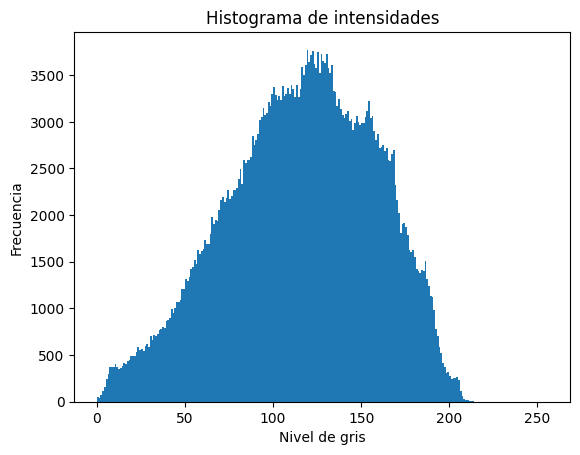

In [9]:
# Cálculo de brillo y contraste
brillo = np.mean(imagen)
contraste = np.std(imagen)
print(f"Brillo: {brillo:.2f}, Contraste: {contraste:.2f}")

# Histograma
plt.hist(imagen.ravel(), bins=256, range=(0, 256))
plt.title("Histograma de intensidades")
plt.xlabel("Nivel de gris"); plt.ylabel("Frecuencia")
plt.show()

In [10]:
imagen = data.moon()

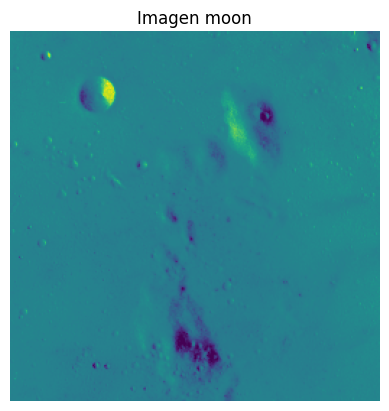

In [11]:
plt.imshow(imagen)
plt.axis('off')
plt.title("Imagen moon")
plt.show()

In [12]:
images = {
    "Camera": data.camera(),
    "Moon": data.moon(),
    "Text": data.text(),
    "Coins": data.coins(),
    "Coffe": data.coffee()
}

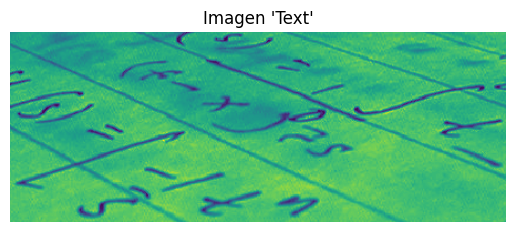

In [13]:
plt.imshow(images["Text"])
plt.axis('off')
plt.title("Imagen 'Text'")
plt.show()

## Carga y Visualización de imagen interna

Carga de una imagen de ejemplo (data.chelsea de skimage)

Visualización original de la imagen

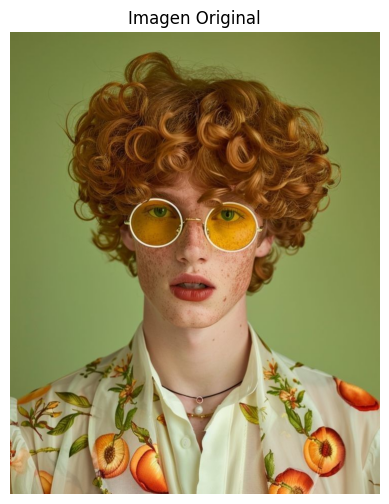

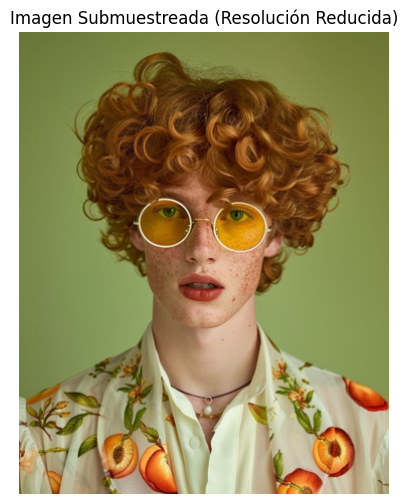

In [14]:
# Importar bibliotecas necesarias
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen desde el mismo directorio
imagen = Image.open("frutal.jpg")  # Ruta local para Deepnote

# Convertir la imagen a una matriz NumPy
imagen_np = np.array(imagen)

# Mostrar la imagen original
plt.figure(figsize=(6, 6))
plt.imshow(imagen_np)
plt.title("Imagen Original")
plt.axis('off')  # Ocultar los ejes

# Reducir la resolución (submuestreo)
factor_reduccion = 2  # Reducir a la mitad
nueva_altura = imagen_np.shape[0] // factor_reduccion
nuevo_ancho = imagen_np.shape[1] // factor_reduccion

# Aplicar submuestreo
imagen_submuestreada = imagen.resize((nuevo_ancho, nueva_altura))
imagen_submuestreada_np = np.array(imagen_submuestreada)

# Mostrar la imagen submuestreada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_submuestreada_np)
plt.title("Imagen Submuestreada (Resolución Reducida)")
plt.axis('off')
plt.show()


## Reducción de calidad: muestreo y cuantificación

### Submuestreo espacial (reducción de resolución)

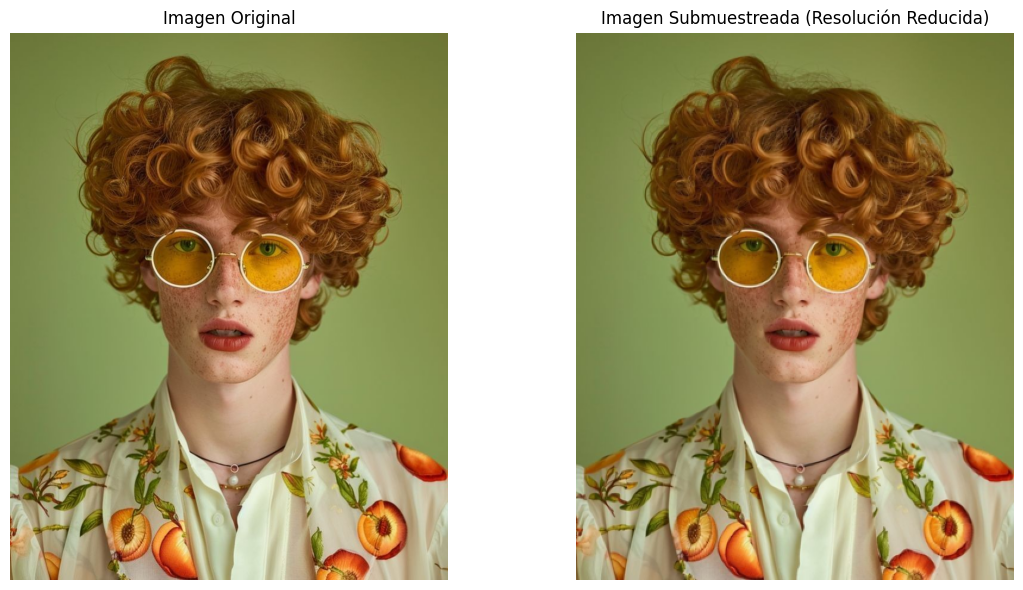

In [15]:
# Crear una figura con dos subplots horizontales (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta figsize según sea necesario

# Mostrar la imagen original en el primer subplot
axes[0].imshow(imagen_np)
axes[0].set_title("Imagen Original")
axes[0].axis('off')

# Mostrar la imagen submuestreada en el segundo subplot
axes[1].imshow(imagen_submuestreada_np) # Aqui fue donde se cambio
axes[1].set_title("Imagen Submuestreada (Resolución Reducida)")
axes[1].axis('off')

# Ajustar el espacio entre los subplots (opcional)
plt.tight_layout()

### Cuantificación de color (reducción de niveles)

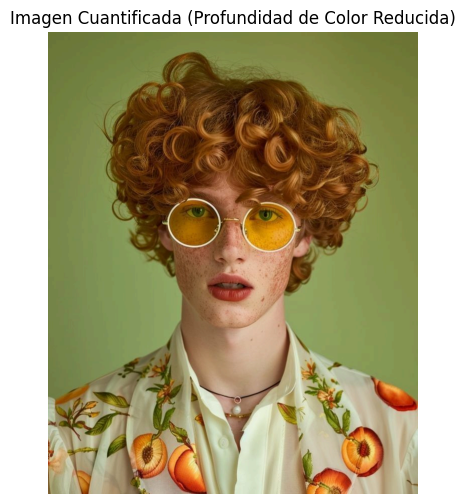

In [16]:
# Reducir la profundidad de color (cuantificación)
profundidad_color_reducida = 64 # Ejemplo: 64 niveles de gris

imagen_cuantificada = imagen_np // (256 // profundidad_color_reducida) * (256 // profundidad_color_reducida)

# Mostrar la imagen cuantificada
plt.figure(figsize=(6, 6))
plt.imshow(imagen_cuantificada, cmap='gray', vmin=0, vmax=255) # cmap='gray' para escala de grises
plt.title("Imagen Cuantificada (Profundidad de Color Reducida)")
plt.axis('off')
plt.show()

In [17]:
im = Image.open('frutal.jpg')

In [18]:
print(im.width, im.height, im.mode, im.format, type(im))

736 920 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


### Imagen renderizada con distintos métodos de interpolación

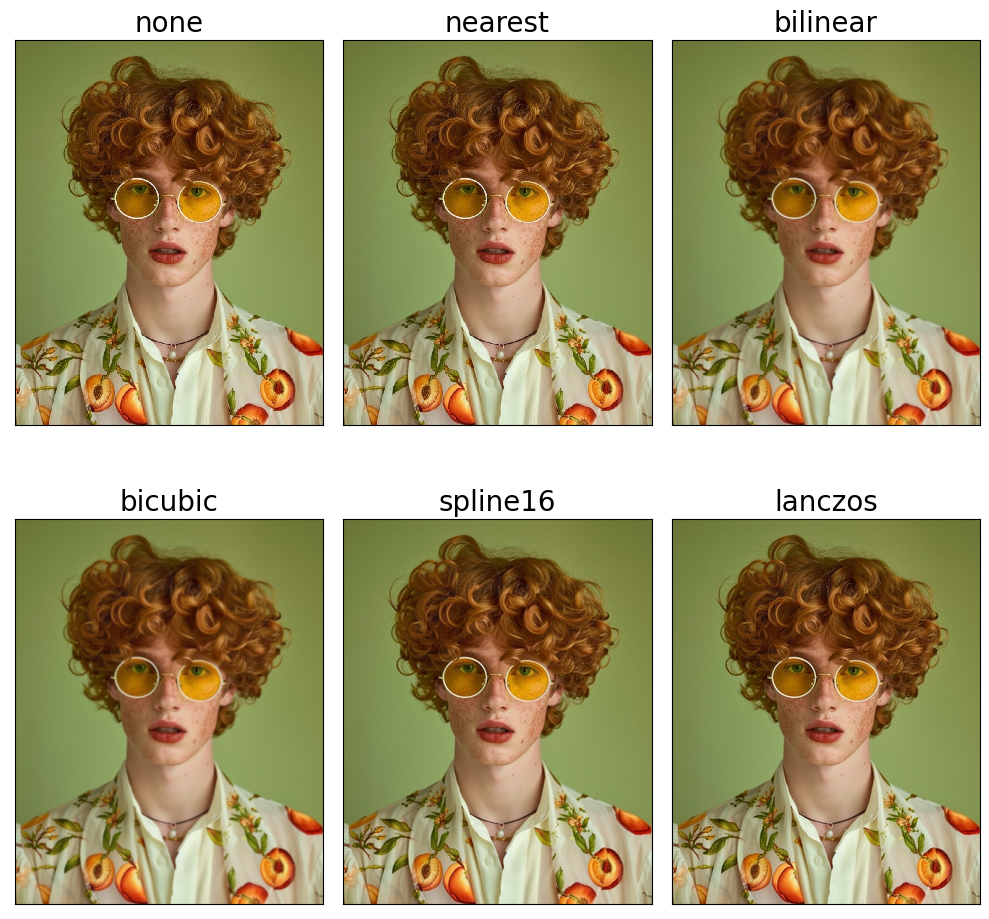

In [19]:
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for ax, interp_method in zip(axes.flat, methods):
 ax.imshow(im, interpolation=interp_method)
 ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>